In [4]:
pip install folium

     -------------------------------------- 100.0/100.0 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 56.3/56.3 kB 2.9 MB/s eta 0:00:00
     ------------------------------------ 133.2/133.2 kB 984.0 kB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


# 광진구 인구현황 지도 시각화

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False
import folium
import json

people = pd.read_csv('서울특별시_광진구_인구현황_20231231.csv', encoding='cp949') #index_col='행정기관'
new_people = people.drop(0, axis=0)
print(new_people)

geo='EMD_Seoul.geojson'
geo_str=json.load(open(geo, encoding='utf-8'))

gwangjin=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
folium.Choropleth(geo_data=geo_str, data=new_people, columns=['행정기관', '계'],
                    fill_color='Blues',fill_opacity=1,line_opacity=0.5, key_on='feature.properties.ADM_DR_NM').add_to(gwangjin) 
gwangjin

    행정기관      계  인구수(남)  인구수(여)  지역(구성비)  구성비(남)  구성비(여)     성비    세대수  세대당인구
1   중곡1동  15239    7215    8024     4.54    2.15    2.39  89.92   8651   1.76
2   중곡2동  20521    9639   10882     6.12    2.87    3.24  88.58  10572   1.94
3   중곡3동  15727    7761    7966     4.69    2.31    2.37  97.43   8518   1.85
4   중곡4동  27594   13441   14153     8.22    4.01    4.22  94.97  13066   2.11
5     능동  11097    5085    6012     3.31    1.52    1.79  84.58   6480   1.71
6   구의1동  23127   11060   12067     6.89    3.30    3.60  91.65  13100   1.77
7   구의2동  25610   12219   13391     7.63    3.64    3.99  91.25  11485   2.23
8   구의3동  27840   13148   14692     8.30    3.92    4.38  89.49  12051   2.31
9    광장동  33971   16440   17531    10.12    4.90    5.22  93.78  11855   2.87
10  자양1동  21833   10576   11257     6.51    3.15    3.35  93.95  11985   1.82
11  자양2동  23628   11467   12161     7.04    3.42    3.62  94.29  10913   2.17
12  자양3동  27221   13001   14220     8.11    3.87    4.24  91.43 

# 광진구 인구현황 원그래프

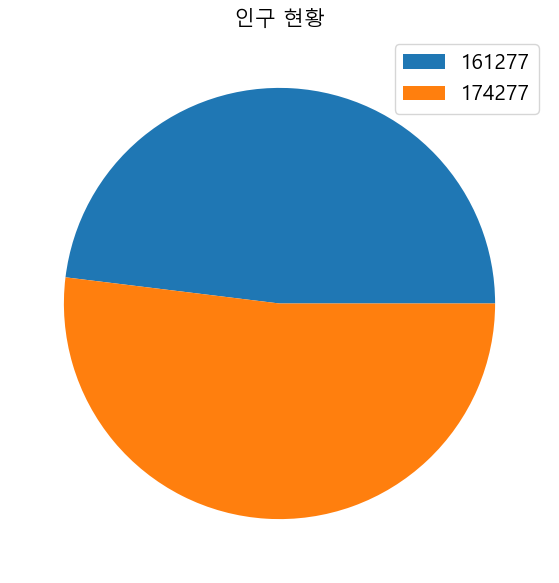

In [46]:
df = pd.read_csv('서울특별시_광진구_인구현황_20231231.csv', encoding='cp949')
new_df = df.drop(0, axis=0)
#print(new_df)
new_df=new_df.iloc[:,2:4]
new_df=new_df.sum(axis=0)
plt.figure(figsize=(12,7))
plt.title('인구 현황', fontsize=15)
plt.pie(new_df)
plt.legend(new_df)
plt.show()

In [2]:
import requests, json

def get_location(address):
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  headers = {"Authorization": "KakaoAK 2ab787c37f03349a696c88ff323d4815"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  crd = {"lat": str(address['y']), "lng": str(address['x'])}
  address_name = address['address_name']

  return crd

# test = get_location('서울특별시 광진구 용마산로146')
# test.values()

# 광진구 가로쓰레기통 설치정보 지도 시각화

In [3]:
df = pd.read_excel('서울특별시 가로쓰레기통 설치정보_202312.xlsx', usecols='B:D', skiprows=4)

df1 = df.loc[df['자치구명'] == '광진구', ['자치구명', '설치위치(도로명 주소)', '세부 위치']]
df1['설치위치(도로명 주소)'] = '서울특별시 광진구 ' + df1['설치위치(도로명 주소)'].map(str)

# geo='EMD_Seoul.geojson'
# geo_str=json.load(open(geo, encoding='utf-8'))

# gwangjin=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
# folium.Choropleth(geo_data=geo_str, data=df1, columns=['설치위치(도로명 주소)'],
#                     fill_color='Blues',fill_opacity=1,line_opacity=0.5, key_on='feature.properties.ADM_DR_NM').add_to(gwangjin) 
# gwangjin

new_df=df1.loc[:,['설치위치(도로명 주소)']]
latitude = []
longtitude = []
#new_df.rename(columns={'설치위치(도로명 주소)':'address'}, inplace=True)

for i in new_df['설치위치(도로명 주소)']:
    a = get_location(i)
    a2 = list(a.values())
    latitude.append(a2[0])
    longtitude.append(a2[1])

address_df = pd.DataFrame({'자치구명': df1['자치구명'],'도로명 주소': new_df['설치위치(도로명 주소)'],'위도':latitude,'경도':longtitude})
address_df

# mean_lat=address_df['위도'].mean()
# mean_lon=address_df['경도'].mean()

gwangjin_trash=folium.Map(location =[37.535,127.084],zoom_start=12,tiles='cartodbpositron' )
#print(len(address_df.index))
for i in address_df.index:
    name = address_df.loc[i, '도로명 주소']
    lat = address_df.loc[i, '위도']
    lng = address_df.loc[i, '경도']
    marker = folium.Marker([lat,lng], popup=name)
    marker.add_to(gwangjin_trash)
gwangjin_trash

# 데이터프레임 합치기

In [21]:
# people_df=pd.DataFrame({'행정기관':new_people['행정기관'], '계':new_people['계']})
# #new_people=new_people.loc[:,['행정기관', '계']]
# people_df.to_excel('광진구 빅데이터 인구현황 모델링용.xlsx', index=False)

In [24]:
address_df.to_excel('광진구 빅데이터 가로쓰레기통 설치정보 모델링용.xlsx', index=False)

In [4]:
file1=pd.read_excel('광진구 빅데이터 가로쓰레기통 설치정보 모델링용.xlsx')
file2=pd.read_excel('인구수 비례 행정동 배출량 수정.xlsx')
result=pd.merge(file1, file2)
result_df=pd.DataFrame(data=result)
result_df

,자치구명,도로명 주소,위도,경도,중곡동,능동,구의동,광장동,자양동,화양동,군자동
0,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389
1,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389
2,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389
3,광진구,서울특별시 광진구 강변역로 50,37.534539,127.094184,941,2274,100,37,102,3865,389
4,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389
...,...,...,...,...,...,...,...,...,...,...,...
96,광진구,서울특별시 광진구 강변역로40-2,37.536199,127.093538,941,2274,100,37,102,3865,389
97,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389
98,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389
99,광진구,서울특별시 광진구 천호대로 606,37.554806,127.084667,941,2274,100,37,102,3865,389


# 22, 23년도 기준 클러스터링 데이터 셋 구축

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
file=pd.read_excel('최종 클러스터링용 100m 위경도 변환.xlsx')
result_df=pd.DataFrame(data=file)
result_df

,행정동,위도,경도
0,구의동,37.542481,127.085671
1,중곡동,37.560645,127.080092
2,구의동,37.542481,127.085671
3,중곡동,37.560645,127.080092
4,광장동,37.546925,127.103035
...,...,...,...
1699,자양동,37.534547,127.082367
1700,자양동,37.534547,127.082367
1701,군자동,37.555145,127.075903
1702,자양동,37.534547,127.082367


In [59]:
cluster_data=pd.DataFrame(data=result_df)
cluster_data

,행정동,위도,경도
0,구의동,37.542481,127.085671
1,중곡동,37.560645,127.080092
2,구의동,37.542481,127.085671
3,중곡동,37.560645,127.080092
4,광장동,37.546925,127.103035
...,...,...,...
1699,자양동,37.534547,127.082367
1700,자양동,37.534547,127.082367
1701,군자동,37.555145,127.075903
1702,자양동,37.534547,127.082367


In [60]:
X = cluster_data.iloc[:, :].values
X[:5]

array([['구의동', 37.54248073021412, 127.0856709633658],
       ['중곡동', 37.56064516213238, 127.080091552167],
       ['구의동', 37.54248073021412, 127.0856709633658],
       ['중곡동', 37.56064516213238, 127.080091552167],
       ['광장동', 37.54692499880753, 127.1030348597741]], dtype=object)

# k-means 클러스터링 및 최적의 K값 찾기 (Elbow method 이용)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = sc.fit_transform(cluster_data[['위도', '경도', '중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동']])
X = sc.fit_transform(cluster_data.iloc[:,1:])
X[:5]

array([[-0.44998588,  0.17234406],
       [ 1.41210285, -0.4893347 ],
       [-0.44998588,  0.17234406],
       [ 1.41210285, -0.4893347 ],
       [ 0.00560901,  2.23157955]])

C:\Users\hdemn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\hdemn\AppData\Local\Temp\ipykernel_44044\1331589719.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X)
C:\Users\hdemn\AppData\Local\Temp\ipykernel_44044\1331589719.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
C:\Users\hdemn\AppData\Local\Temp\ipykernel_44044\1331589719.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)


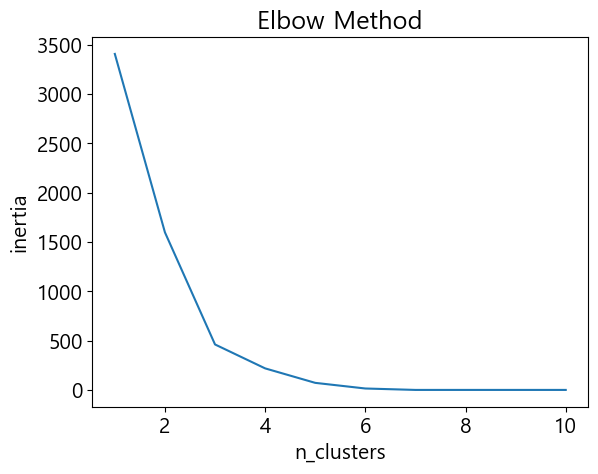

In [63]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [64]:
# kmeans = KMeans(n_clusters=3, random_state=0)
# y_kmeans = kmeans.fit_predict(X)
# y_kmeans

array([2, 1, 2, ..., 1, 2, 2])

In [65]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_data.iloc[:, 1:])
labels=kmeans.labels_
centers=kmeans.cluster_centers_
print(labels)
cluster_data['clustering']=labels
cluster_data

[1 0 1 ... 0 1 1]


,행정동,위도,경도,clustering
0,구의동,37.542481,127.085671,1
1,중곡동,37.560645,127.080092,0
2,구의동,37.542481,127.085671,1
3,중곡동,37.560645,127.080092,0
4,광장동,37.546925,127.103035,2
...,...,...,...,...
1699,자양동,37.534547,127.082367,1
1700,자양동,37.534547,127.082367,1
1701,군자동,37.555145,127.075903,0
1702,자양동,37.534547,127.082367,1


# gmm 클러스터링

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(cluster_data.iloc[:, 2:])
predict=gmm.predict(cluster_data.iloc[:, 2:])
print(predict)
cluster_data['clustering']=predict
cluster_data

[1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1]


,자치구명,도로명 주소,위도,경도,중곡동,능동,구의동,광장동,자양동,화양동,군자동,clustering
0,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389,1
1,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389,1
2,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389,0
3,광진구,서울특별시 광진구 강변역로 50,37.534539,127.094184,941,2274,100,37,102,3865,389,0
4,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,광진구,서울특별시 광진구 강변역로40-2,37.536199,127.093538,941,2274,100,37,102,3865,389,0
97,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389,1
98,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389,1
99,광진구,서울특별시 광진구 천호대로 606,37.554806,127.084667,941,2274,100,37,102,3865,389,1


# DBSCAN 클러스터링

In [21]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=2) # DBSCAN (eps : epsilon, min_samples : min point)
dbscan.fit(cluster_data.iloc[:, 2:4])
labels=dbscan.labels_
print(labels)
cluster_data['clustering']=labels
cluster_data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,자치구명,도로명 주소,위도,경도,중곡동,능동,구의동,광장동,자양동,화양동,군자동,clustering
0,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389,0
1,광진구,서울특별시 광진구 광나루로 533,37.545069,127.088860,941,2274,100,37,102,3865,389,0
2,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389,0
3,광진구,서울특별시 광진구 강변역로 50,37.534539,127.094184,941,2274,100,37,102,3865,389,0
4,광진구,서울특별시 광진구 강변역로 53,37.535169,127.094665,941,2274,100,37,102,3865,389,0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,광진구,서울특별시 광진구 강변역로40-2,37.536199,127.093538,941,2274,100,37,102,3865,389,0
97,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389,0
98,광진구,서울특별시 광진구 천호대로620,37.554126,127.086229,941,2274,100,37,102,3865,389,0
99,광진구,서울특별시 광진구 천호대로 606,37.554806,127.084667,941,2274,100,37,102,3865,389,0


# MCLP 알고리즘 적용

In [ ]:
# I=cluster_data.index.values #전체 위경도
# J= #cluster 돌린 후 위치 위경도
# S=500 #최소 쓰레기통 설치 가능 거리 500m 설정
# min_dist=100 #격자 구간 별 거리 100m
# a=cluster_data.clustering.values
# P=20 #20개의 쓰레기통 설치 가정
# N=[[j for j in J if d[i][j] < S] for i in I]
# R=[[int(r)]]

In [ ]:
K=20
r=500
I=cluster_data.index.values
J=
mclp=(I, K, r, J)

# 역지오코딩 (격자 중심점 위경도 주소로 변환)

In [2]:
pip install geopy

     -------------------------------------- 125.4/125.4 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return address

address = geocoding_reverse('37.543651399935179, 127.085119990377223')
print(address)

자양로30길, 구의1동, 광진구, 서울특별시, 05038, 대한민국


In [5]:
import requests, json, pprint

def get_address(lat, lng):
    url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x="+lng+"&y="+lat
    headers = {"Authorization": "KakaoAK 2ab787c37f03349a696c88ff323d4815"}
    api_json = requests.get(url, headers=headers)
    full_address = json.loads(api_json.text)

    return full_address

In [66]:
geo=json.load(open('광진구_geojson.geojson',encoding='utf-8'))
f = pd.json_normalize(geo['features'])
geo_df=pd.DataFrame(data=f['geometry.coordinates'])
# geo_df.loc[0]
# for i in len(geo_df):
#     get_address(geo_df[0], geo_df[1])

dong=[]
latitude=[] #위도
longtitude=[] #경도

for row in geo_df.iterrows():
    a=get_address(str(row[1][0][1]), str(row[1][0][0]))
    dong.append(a['documents'][0]['region_3depth_name'])
    latitude.append(a['documents'][0]['y'])
    longtitude.append(a['documents'][0]['x'])

gwangjin_cluster_address = pd.DataFrame({'행정동':dong,'위도':latitude,'경도':longtitude})
gwangjin_cluster_address

,행정동,위도,경도
0,구의동,37.542481,127.085671
1,중곡동,37.560645,127.080092
2,구의동,37.542481,127.085671
3,중곡동,37.560645,127.080092
4,광장동,37.546925,127.103035
...,...,...,...
1807,자양동,37.534547,127.082367
1808,면목동,37.587327,127.087430
1809,군자동,37.555145,127.075903
1810,자양동,37.534547,127.082367


In [16]:
geo_df.to_excel('geo_df 엑셀 변환.xlsx', index=False)

In [27]:
gwangjin_cluster_address.to_excel('전체 광진구 100m 격자 주소 위경도 변환.xlsx', index=False)

In [57]:
df=pd.read_excel('전체 광진구 100m 격자 주소 위경도 변환.xlsx')

targets=['구의동', '중곡동', '능동', '광장동', '자양동', '화양동', '군자동']

data_gwangjin_address=df.loc[df['행정동'].isin(targets), ['행정동', '위도', '경도']]
data_gwangjin_address.to_excel('최종 클러스터링용 100m 위경도 변환.xlsx', index=False)